In [1]:
import numpy                as     np
import matplotlib.pyplot    as     plt
from   matplotlib           import cm 
from   mpl_toolkits.mplot3d import Axes3D
from   math                 import sin, cos,  pi

def plot_function(f,xmin,xmax,**kwargs):
    
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

# 1 Testing a projectile simulation

## 1.1 Building a simulation with Euler’s method

In [ ]:
    # 函数返回时间t，水平位置x，垂直位置z的列表
#def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81): # theta in degree 0， g is negative for downward acceleration ， dt is time step
def trajectory(theta,speed=40,height=0,dt=0.01,g=-9.81): # theta in degree 0， g is negative for downward acceleration ， dt is time step
    # 这个函数是错的，速度根本没有用上

    # vx = speed * cos(pi * theta / 180)  # 角度转弧度 ,  20 is the speed 
    # vz = speed * sin(pi * theta / 180)
    vx = speed * cos(theta * (pi / 180))   # 角度转弧度
    vz = speed * sin(theta * (pi  / 180))
    t,x,z = 0, 0, height
    ts, xs, zs = [t], [x], [z]

    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
        
    return ts, xs, zs

In [13]:
def plot_trajectories(*trajs,show_seconds=False): # trajs is a list of trajectories, each trajectory is a tuple of (ts,xs,zs) 

    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

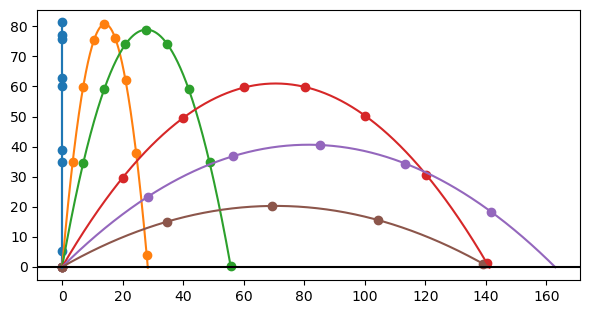

In [ ]:
plot_trajectories( 
    trajectory(90),
    trajectory(85),
    trajectory(80),
    trajectory(60),
    trajectory(45),
    trajectory(30),
    show_seconds=True
    )
# 看点数，一个点表示一秒钟，60度的滞空时间较长， 45度可以达到最远射程, 90度垂直上抛，落地位置与发射位置相同, 滞空时间最大值
# 本图不符合物理知识，上升点和下降点不完全对称，是因为本计算方法的误差累积造成的，是数值计算的一个典型问题， 
# 在dt时间内，速度和位置都假设是匀速变化的，实际情况并非如此，dt越小，误差越小

## 1.2 Measuring properties of the trajectory

In [22]:
def landing_position(traj):
    return traj[1][-1] #    最后一个水平位置

def hang_time(traj):
    return traj[0][-1] #   最后一个时间

def max_height(traj):
    return max(traj[2]) # 最高点垂直位置

## 1.3 Exploring different launch angles

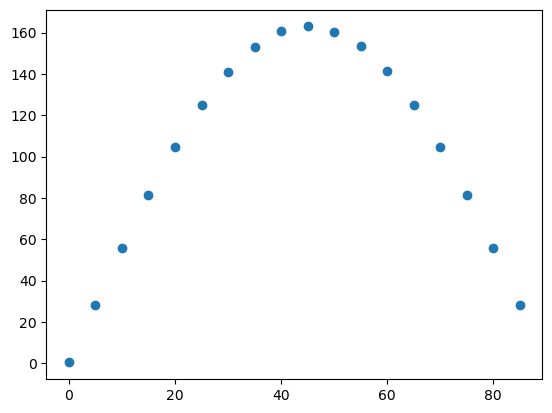

In [23]:
angles = range(0,90,5)
landing_positions = [landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)

## 1.4 Exercises

**Exercise:** How far does the cannonball go when fired at an angle of 50 degrees from an initial height of zero?  How about if it is fired at an angle of 130 degrees?

In [24]:
landing_position(trajectory(50))

160.4397873777616

In [25]:
landing_position(trajectory(130))

-160.4397873777616

**Mini-project:** Enhance the `plot_trajectories` function in the source code to draw a large dot on the trajectory graph at each passing second, so we can see the passing of time on the plot.

See implementation above

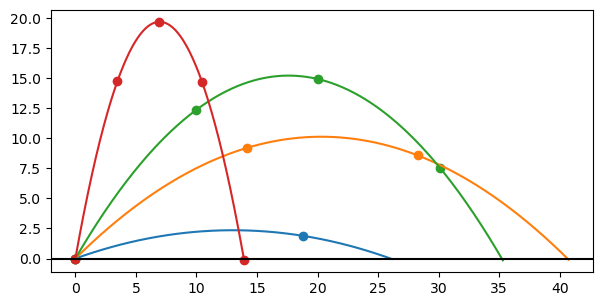

In [9]:
plot_trajectories(
    trajectory(20), 
    trajectory(45),
    trajectory(60),
    trajectory(80), 
    show_seconds=True)

**Exercise:** Make a scatterplot of hang time versus angle, for angles between 0 and 180 degrees.  What launch angle produces the maximum hang time?

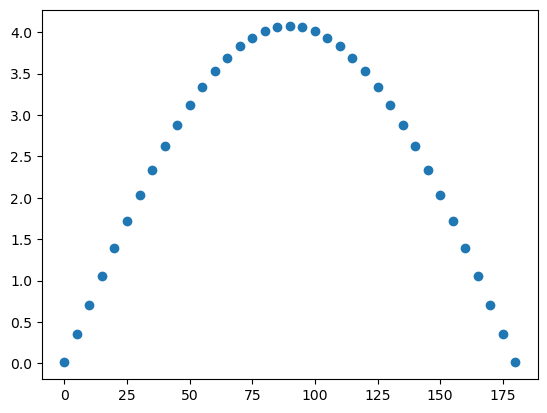

In [ ]:
test_angles = range(0,181,5)
hang_times = [hang_time(trajectory(theta)) for theta in test_angles] #定义在1.2节中定义的函数
plt.scatter(test_angles, hang_times)
# 90度滞空时间最长，约为1.5秒，上升高度也最高，约为8米

**Mini-project:** Write a function `plot_trajectory_metric` which plots the result of any metric we want over a given set of theta values.  For instance `plot_trajectory_metric(landing_position,[10,20,30])` should make a scatter plot of landing positions versus launch angle for launch angles of 10, 20, and 30 degrees.  

As a bonus, pass the keyword arguments from `plot_trajectory_metric` to the internal calls of the trajectory function, so you could re-run the test with a different simulation parameter. For instance, `plot_trajectory_metric(landing_position,[10,20,30], height=10)` would make the same plot, but simulated with a 10 meter initial launch height.

In [ ]:
def plot_trajectory_metric(metric,thetas,**settings):
    plt.scatter(thetas,
                [metric(trajectory(theta,**settings)) for theta in thetas]) 

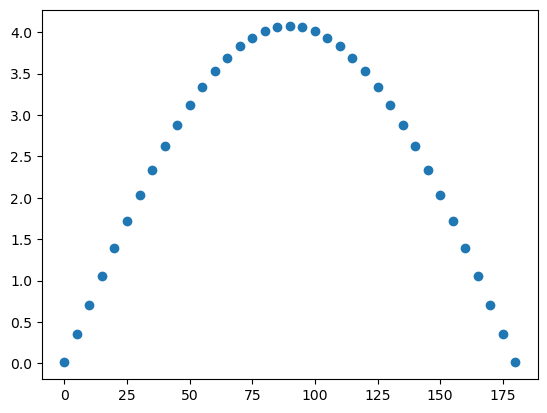

In [ ]:
plot_trajectory_metric(hang_time, range(0,181,5)) # plot the trajectory of the hang time section 1.2 

**Mini-project:** What is the approximate launch angle that yields the greatest range for the cannonball with a 10 meter initial launch height?

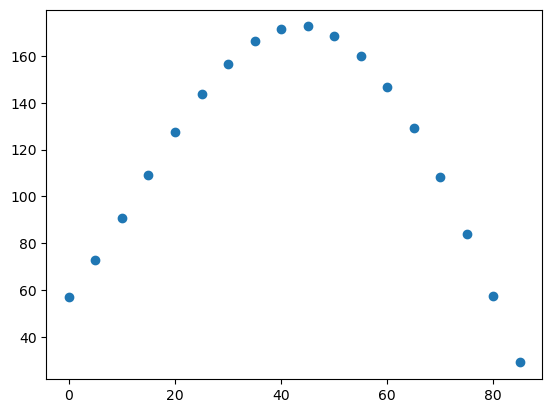

In [27]:
plot_trajectory_metric(landing_position,range(0,90,5), height=10)

# 2 Calculating the optimal range

## 2.1 Finding the projectile range as a function of the launch angle

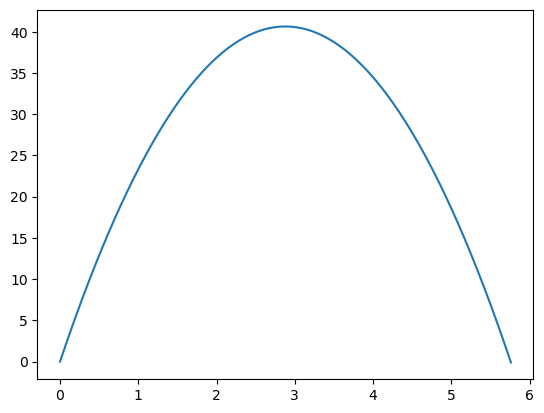

In [ ]:
trj = trajectory(45)  #  create a trajectory object with an angle of ======>> 45 degrees
ts, zs = trj[0], trj[2]  # extract time and height data from trajectory 
plt.plot(ts,zs)

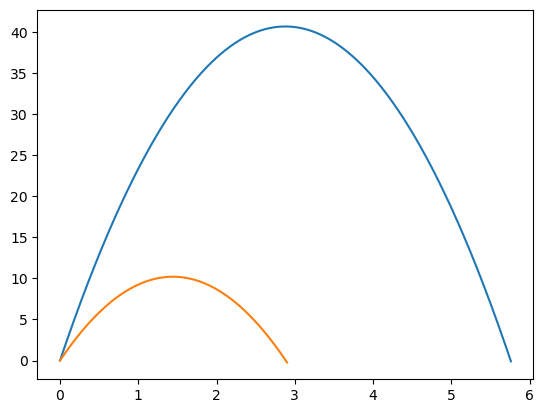

In [29]:
def z(t):  #  这是精确值函数 
    return 20*sin(45*pi/180)*t + (-9.81/2)*t**2

plt.plot(ts,zs)
plot_function(z,0,2.9)

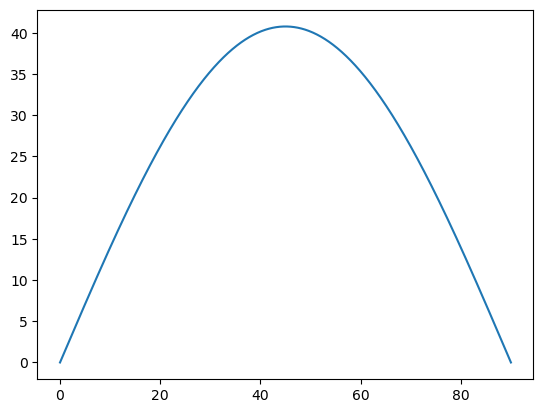

In [30]:
def r(theta):
    return (-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180)

plot_function(r,0,90)

## 2.2 Solving for the maximum range

In [31]:
r(45)

40.774719673802245

In [18]:
r(135)

-40.77471967380224

## 2.3 Identifying maxima and minima

# 3 Enhancing our simulation

## 3.1 Adding another dimension

In [ ]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81):

    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180) # initial wrong with 20 as fixed speed 
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    
    t,x,y,z = 0, 0, 0, height
    
    ts, xs, ys, zs = [t], [x], [y], [z]
    
    while z >= 0:
        t  += dt
        vz +=  g * dt
        x  += vx * dt
        y  += vy * dt
        z  += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs # return the lists of time, x, y, and z coordinates 

In [ ]:
def plot_trajectory3d(traj):

    fig, ax = plt.gcf(), plt.gca() # get current figure and axis objects for 3D plotting 
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')  #     ax = fig.gca(projection='3d') 
    ax.plot(traj[1],traj[2],traj[3])

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

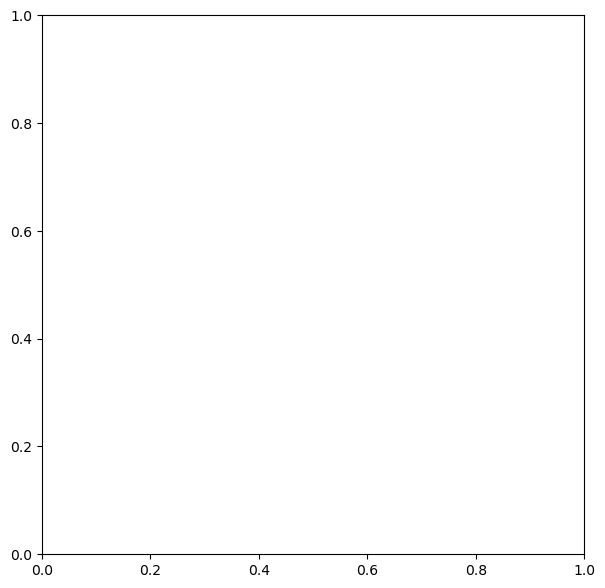

In [36]:
plot_trajectory3d(trajectory3d(45,45))

## 3.2 Modeling terrain around the cannon

In [59]:
def flat_ground(x,y):
    return 0

In [60]:
def ridge(x,y):
    return (x**2 - 5*y**2) / 2500

In [55]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [65]:
#flat_ground = 0 # define the elevation of the ground section 3.2
def plot_trajectories_3d(*trajs, elevation=flat_ground, bounds=None,zbounds=None,shadows=False):

    fig = plt.gcf() 
    ax = fig.add_subplot(111, projection='3d')
    #plt.gca(projection='3d') #ax = fig.gca(projection='3d') # this is deprecated not working anymore

    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

In [ ]:
def plot_trajectory3d(traj):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(traj[1], traj[2], traj[3])

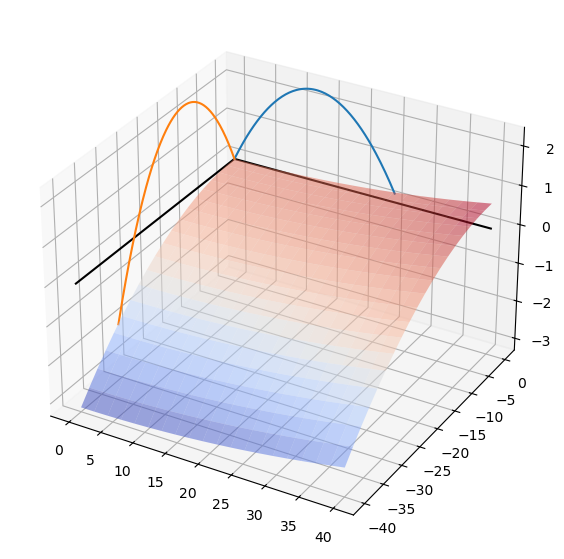

In [66]:
plot_trajectories_3d(
    trajectory3d(20,0,  elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge)

## 3.3 Solving for the range of the projectile in 3D

In [67]:
from math import sqrt

B = 0.001 #<1>
C = 0.005
v = 20
g = -9.81

def velocity_components(v,theta,phi): #<2>
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx,vy,vz
    
def landing_distance(theta,phi): #<3>
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2) #<4>
    a = (g/2) - B * vx**2 + C * vy**2 #<5>
    b = vz
    landing_time = -b/a #<6>
    landing_distance = v_xy * landing_time #<7>
    return landing_distance

## 3.4 Exercises

**Mini-project:** When an object like a cannonball moves quickly through the air, it experiences frictional force from the air, called drag, which pushes it in the opposite direction it’s moving.  The drag force depends on a lot of factors, including the size and shape of the cannonball and the density of the air, but for simplicity, let’s assume it works as follows.  If $\vec{v}$ is the cannonball’s velocity vector at any point, the drag force $\vec{F}_d$ will be:

$$\vec{F}_d = -\alpha \vec{v}$$

where $\alpha$  (the greek letter “alpha”) is a number giving the magnitude of drag felt by a particular object in particular air.  The fact that the drag force is proportional to the velocity means that as an object speeds up, it feels more and more drag.  

As a mini-project, figure out how to add a drag parameter to the cannonball simulation, and show that drag causes the cannonball to slow down.


In [68]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground,drag=0):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vx -= (drag * vx) * dt
        vy -= (drag * vy) * dt
        vz += (g - (drag * vz)) * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

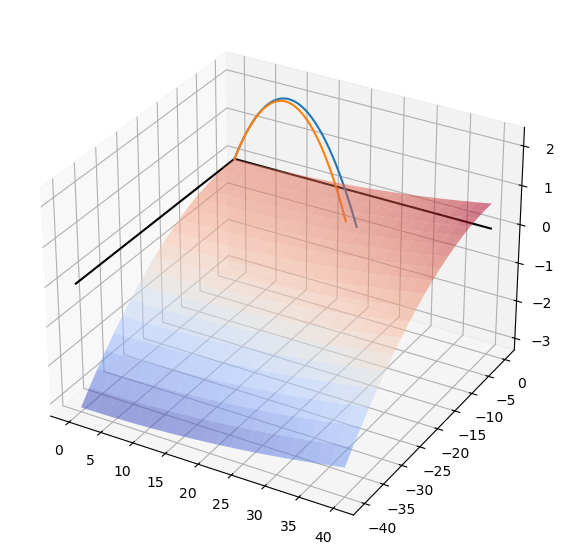

In [69]:
plot_trajectories_3d(
    trajectory3d(20,-20,elevation=ridge),
    trajectory3d(20,-20,elevation=ridge,drag=0.1),
    bounds=[0,40,-40,0],
    elevation=ridge)

# 4 Optimizing range using gradient ascent

## 4.1 Plotting range versus launch parameters

In [72]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

<Figure size 700x700 with 0 Axes>

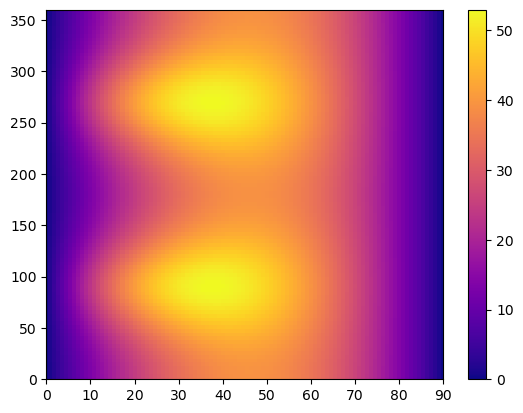

In [73]:
scalar_field_heatmap(landing_distance,0,90,0,360)

## 4.2 The gradient of the range function

In [74]:
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.gcf()
    fig.set_size_inches(7,7)

    #ax = fig.gca(projection='3d') # this is deprecated not working anymore
    ax = fig.add_subplot(111, projection='3d')  # this works and is the correct way to add a 3D axis to a figure 

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

In [76]:
?landing_distance

Signature: landing_distance(theta, phi)
Docstring: <no docstring>
File:      c:\users\zhen-\appdata\local\temp\ipykernel_10556\1811690325.py
Type:      function

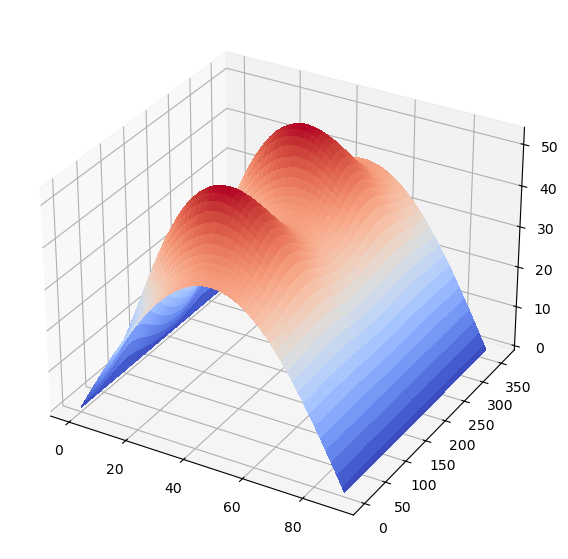

In [75]:
plot_scalar_field(landing_distance,0,90,0,360)

## 4.3 Finding the uphill direction with the gradient

In [ ]:
def secant_slope(f,xmin,xmax): # the secant line approximation of the slope of f(x) at x=xmin and x=xmax
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6): # approximate derivative using secant slope
    return secant_slope(f,x-dx,x+dx)

In [ ]:
def approx_gradient(f,x0,y0,dx=1e-6): # Approximate gradient of f at (x0,y0) 

    partial_x = approx_derivative(lambda x: f(x,y0), x0, dx=dx)
    partial_y = approx_derivative(lambda y: f(x0,y), y0, dx=dx)
    
    return (partial_x,partial_y)

In [79]:
def landing_distance_gradient(theta,phi):
    return approx_gradient(landing_distance, theta, phi)

Feel free to ignore the following code, which just supports the graphic of overlaying a vector field on a heatmap.

<Figure size 700x700 with 0 Axes>

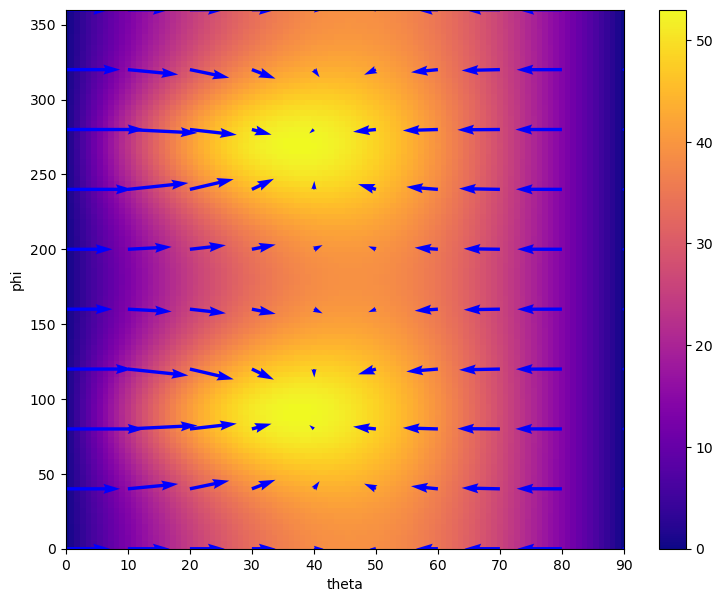

In [85]:
from vectors import to_polar, to_cartesian

# not used 
# def draw_arrow(tip,tail,color='g'): # k for black color g   for green color 

#     tip_length = (plt.xlim()[1] - plt.xlim()[0]) / 20.
#     length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
#     new_length = length - tip_length
#     new_y = (tip[1] - tail[1]) * (new_length / length)
#     new_x = (tip[0] - tail[0]) * (new_length / length)
#     plt.gca().arrow(tail[0], tail[1], new_x, new_y,
                    
#     head_width=tip_length/1.5, 
#     head_length=tip_length/2,
#     fc=color, ec=color)
    
def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,color='k'):

    X,Y = np.meshgrid(np.linspace(xmin,xmax, xsteps),np.linspace(ymin,ymax, ysteps))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)

    plt.quiver(X, Y, U, V,color=color)
    fig = plt.gcf()

scalar_field_heatmap(landing_distance,0,90,0,360)
plot_vector_field(landing_distance_gradient,0,90,0,360,xsteps=10,ysteps=10,color='b') # k black color b 

plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

<Figure size 700x700 with 0 Axes>

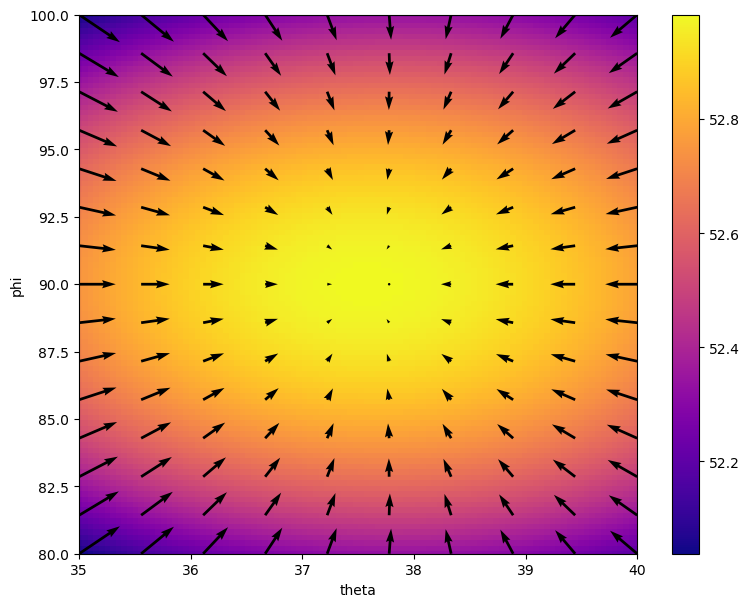

In [ ]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plot_vector_field(landing_distance_gradient,35,40,80,100,xsteps=10,ysteps=15,color='k')

plt.xlabel('theta')
plt.ylabel('phi')

plt.gcf().set_size_inches(9,7)

## 4.4 Implementing gradient ascent

In [87]:
from vectors import length

def gradient_ascent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [88]:
gradient_ascent(landing_distance,36,83)

(37.581147561764155, 89.99992514787517)

In [ ]:
def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)

    while length(grad) > tolerance: # while gradient is not small enough , continue to move in direction of gradient
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [90]:
gradient_ascent_points(landing_distance,36,83)

([36,
  36.122600166772905,
  36.23613677117784,
  36.34128767809185,
  36.43867738707969,
  36.528881661579746,
  36.612431593208484,
  36.689817410269534,
  36.76149182796271,
  36.82787319253559,
  36.889348238189385,
  36.94627463082189,
  36.998983312818545,
  37.04778060625894,
  37.09295017401476,
  37.1347547357105,
  37.17343773749891,
  37.20922482998986,
  37.24232519341257,
  37.27293280238169,
  37.30122755921293,
  37.32737638815892,
  37.35153417332558,
  37.373844629087024,
  37.394441177605785,
  37.41344766648102,
  37.43097908994937,
  37.44714219995173,
  37.46203614206898,
  37.47575300263992,
  37.48837829193029,
  37.49999144506543,
  37.51066624835594,
  37.520471237201555,
  37.529470054915286,
  37.537721861285455,
  37.545281588371104,
  37.55220026024622,
  37.5585252985331,
  37.5643007355652,
  37.56956745597163,
  37.57436347378886,
  37.57872406035837,
  37.58268198235851,
  37.58626769365101,
  37.58950943120426,
  37.59243345312513,
  37.59506413458223

<Figure size 700x700 with 0 Axes>

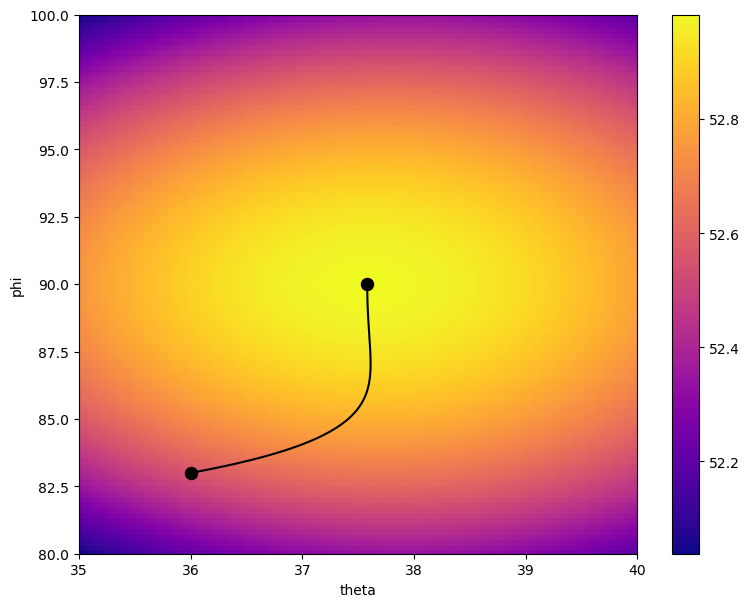

In [ ]:
from vectors import to_polar, to_cartesian

scalar_field_heatmap(landing_distance,35,40,80,100)

plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75) # s is the size of the marker 75, begining and end point of the gradient ascent

plt.plot(*gradient_ascent_points(landing_distance,36,83),c='k')

plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [94]:
landing_distance(37.58114751557887, 89.99992616039857)

52.98310689354378

## 4.5 Exercises

**Exercise:** On the heatmap, simultaneously plot the paths of gradient ascent from 20 randomly chosen points.  All of the paths should end up at one of the two maxima.

<Figure size 700x700 with 0 Axes>

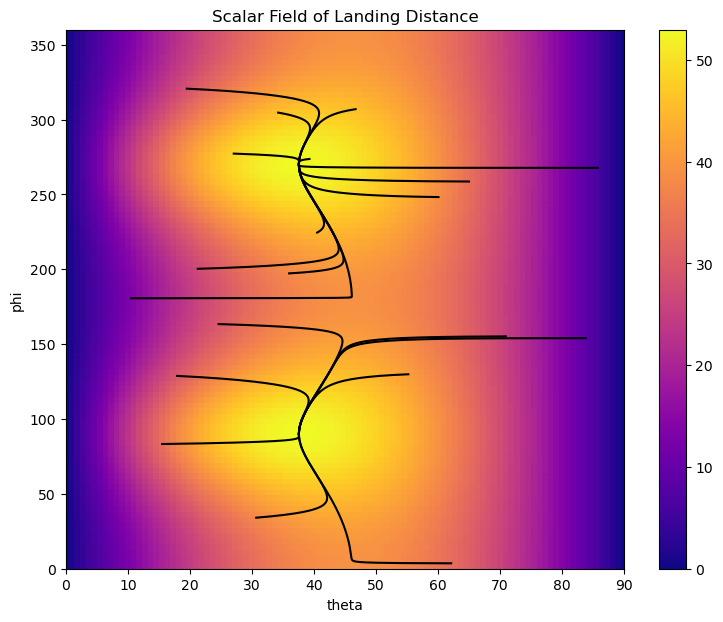

In [97]:
scalar_field_heatmap(landing_distance,0,90,0,360) # plot the scalar field of landing distance 

plt.xlabel('theta')
plt.ylabel('phi')
plt.title('Scalar Field of Landing Distance') 

gap = gradient_ascent_points(landing_distance,60,190,1000) # find the optimal landing point using gradient ascent

from random import uniform
for x in range(0,20):
    gap = gradient_ascent_points(landing_distance,uniform(0,90),uniform(0,360))
    plt.plot(*gap,c='k')
plt.gcf().set_size_inches(9,7)

**Exercise:** Find the point on $r(\theta,\phi)$ where the gradient is zero but the function is not maximized.

In [99]:
gradient_ascent(landing_distance,0,180)

(46.122613357930206, 180.0)

**Exercise:** How many steps does it take for gradient ascent to reach the origin from (36,83)?  Instead of jumping one gradient, jump 1.5 gradients.  Show that you get there in fewer steps.  What happens if you jump even further in each step?

In [ ]:
def gradient_ascent_points(f,xstart,ystart,rate=1,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]

    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += rate * grad[0]
        y += rate * grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    
    return xs, ys

In [101]:
def count_ascent_steps(f,x,y,rate=1):
    gap = gradient_ascent_points(f,x,y,rate=rate)
    print(gap[0][-1],gap[1][-1])
    return len(gap[0])

In [102]:
count_ascent_steps(landing_distance,36,83)

37.581147561764155 89.99992514787517


854

In [103]:
count_ascent_steps(landing_distance,36,83,rate=1.5) # larger steps for faster ascent

37.58114755288237 89.99992556887184


568

In [104]:
count_ascent_steps(landing_distance,36,83,rate=3)

37.581147483604404 89.99992679988723


282

In [105]:
count_ascent_steps(landing_distance,36,83,rate=10)

37.58114748360439 89.99992495958149


81

In [106]:
count_ascent_steps(landing_distance,36,83,rate=20)

37.58114744807723 89.99992670041118


38

<Figure size 700x700 with 0 Axes>

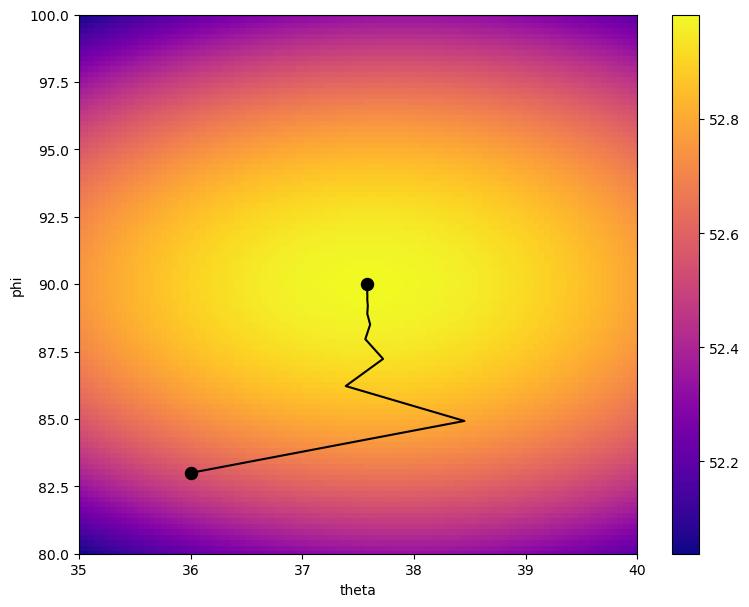

In [107]:
scalar_field_heatmap(landing_distance,35,40,80,100)

plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)

plt.plot(*gradient_ascent_points(landing_distance,36,83,rate=20),c='k')

plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

**Exercise:** What happens when you try to run gradient_ascent directly using simulated results for $r$  as a function of $\theta$ and $\phi$ instead of calculated results?

In [109]:
def simulated_distance_270(theta):
    ts,xs,ys,zs = trajectory3d(theta,270)
    return sqrt(xs[-1]**2 + ys[-1]**2)

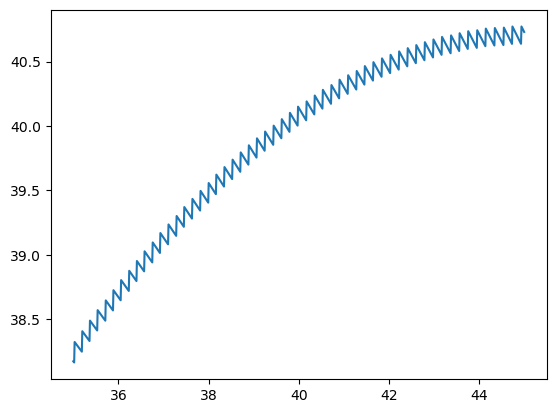

In [110]:
plot_function(simulated_distance_270,35,45)